# READING AND CLEANING THE DATA

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import csv
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("TripAdvisor_English_Reviews_Seoul_Hotels.csv")
print(data.shape)
data.head()

(50178, 7)


,Hotel,Title,Date,Reviewer,Location,Rating,Review
0,9Brick_Hotel,Love the look,Date of stay: December 2022,ChristelleNg wrote a review Jan 2023,"Singapore, Singapore",40,Location not too bad. Near the Hongik station....
1,9Brick_Hotel,Very bad experience,Date of stay: December 2022,Molly123 wrote a review Dec 2022,NaN,10,I asked the hotel to provide another set of co...
2,9Brick_Hotel,Chic design,Date of stay: October 2019,wamysdottir wrote a review Apr 2020,"Copenhagen, Denmark",40,A clean boutique hotel conveniently located wi...
3,9Brick_Hotel,Great location but weak service standards,Date of stay: December 2019,worldtraveller wrote a review Dec 2019,NaN,30,Let me start with what I like about the hotel....
4,9Brick_Hotel,Never better,Date of stay: November 2019,Hui Yingg wrote a review Nov 2019,"Sydney, Australia",40,This hotel exceeded my expectations in terms o...


#### Combine Title and Reviews Columns

In [3]:
data["Review_cmplt"] = data["Title"]+" "+ data["Review"]
data.drop(["Title","Review"], axis = 1, inplace = True)
data.head()

,Hotel,Date,Reviewer,Location,Rating,Review_cmplt
0,9Brick_Hotel,Date of stay: December 2022,ChristelleNg wrote a review Jan 2023,"Singapore, Singapore",40,Love the look Location not too bad. Near the H...
1,9Brick_Hotel,Date of stay: December 2022,Molly123 wrote a review Dec 2022,NaN,10,Very bad experience I asked the hotel to provi...
2,9Brick_Hotel,Date of stay: October 2019,wamysdottir wrote a review Apr 2020,"Copenhagen, Denmark",40,Chic design A clean boutique hotel convenientl...
3,9Brick_Hotel,Date of stay: December 2019,worldtraveller wrote a review Dec 2019,NaN,30,Great location but weak service standards Let ...
4,9Brick_Hotel,Date of stay: November 2019,Hui Yingg wrote a review Nov 2019,"Sydney, Australia",40,Never better This hotel exceeded my expectatio...


#### Checking for null values 

In [4]:
data.isna().sum()

Hotel              0
Date              90
Reviewer           0
Location        9189
Rating             0
Review_cmplt       3
dtype: int64

In [5]:
#Since dropping a small number will not affect the dataset, I will drop the rows with null values for Review_complt column.

#will deal with Location and Date column later

data.dropna(subset=['Review_cmplt'],inplace = True)
data.isna().sum()

Hotel              0
Date              90
Reviewer           0
Location        9188
Rating             0
Review_cmplt       0
dtype: int64

#### Cleaning Data:

1. In the Date column, remove "Date of stay"
2. Keep only English words in Review_complt column
3. Keep only name of the reviewer
4. Make a column for the date of the review written
5. Keep only the country name in the location column
6. Get the ratings out of 5

In [6]:
# Defining functions to clean the data

def clean_date(text):
    try:
        return re.sub(r'Date of stay:', "",text).strip()
    except:
        return None

def clean_reviews(text):
    """
    This will remove only the non english characters and not anything else including punctuation marks.
    Punctuation marks and capital letter play an important role in Sentiment Analysis.
    """
    text = re.sub("[^A-Za-z0-9|\(\)\,\!\[\]\'\"\.\-\{\}\?]+", " ", text)
    return text.strip()

def get_name(text):
    #gets only the name from the Reviewer column
    return text.split("wrote ")[0].strip()


def generate_date(text):
    #gets the date when the review was written from Reviewer column
    return text.split("wrote a review")[1].strip()

def get_country(text):
    
    if text is not None:
        try:
            return text.split(",")[1].strip()
        except:
            return text #ceratin locations have only country
    
def get_rating(rating):
    return rating/10 

In [7]:
clean_date("Date of stay: February 2020")

'February 2020'

In [8]:
data["Review_cmplt"][1067]

'位置方便，但房間有點暗 位置方便，弘大又是機場線，來回機場也非常方便。不好的是房間燈不太夠，一直覺得很暗。地方很夠，二個大行李都可以放得下！very nice room！location is also very good! Shopping,eating,everything nearby hotel, within 10minutes ! Will be come and stay at this hotel again.'

In [9]:
clean_reviews(data["Review_cmplt"][1067])

'very nice room location is also very good! Shopping,eating,everything nearby hotel, within 10minutes ! Will be come and stay at this hotel again.'

In [10]:
# Applying the functions to our dataset

data["reviewer_name"]= data["Reviewer"].apply(get_name)
data["country"]= data["Location"].apply(get_country)
data["rating"]= data["Rating"].apply(get_rating)
data["date_of_stay"] = data["Date"].apply(clean_date)
data["date_review_written"]= data["Reviewer"].apply(generate_date)
data["clean_reviews"] = data["Review_cmplt"].apply(clean_reviews)
data.head()

,Hotel,Date,Reviewer,Location,Rating,Review_cmplt,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews
0,9Brick_Hotel,Date of stay: December 2022,ChristelleNg wrote a review Jan 2023,"Singapore, Singapore",40,Love the look Location not too bad. Near the H...,ChristelleNg,Singapore,4.0,December 2022,Jan 2023,Love the look Location not too bad. Near the H...
1,9Brick_Hotel,Date of stay: December 2022,Molly123 wrote a review Dec 2022,NaN,10,Very bad experience I asked the hotel to provi...,Molly123,NaN,1.0,December 2022,Dec 2022,Very bad experience I asked the hotel to provi...
2,9Brick_Hotel,Date of stay: October 2019,wamysdottir wrote a review Apr 2020,"Copenhagen, Denmark",40,Chic design A clean boutique hotel convenientl...,wamysdottir,Denmark,4.0,October 2019,Apr 2020,Chic design A clean boutique hotel convenientl...
3,9Brick_Hotel,Date of stay: December 2019,worldtraveller wrote a review Dec 2019,NaN,30,Great location but weak service standards Let ...,worldtraveller,NaN,3.0,December 2019,Dec 2019,Great location but weak service standards Let ...
4,9Brick_Hotel,Date of stay: November 2019,Hui Yingg wrote a review Nov 2019,"Sydney, Australia",40,Never better This hotel exceeded my expectatio...,Hui Yingg,Australia,4.0,November 2019,Nov 2019,Never better This hotel exceeded my expectatio...


In [11]:
data.drop(["Date","Reviewer","Location","Rating","Review_cmplt"], axis = 1, inplace = True)
print(data.shape)
data.head()

(50175, 7)


,Hotel,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews
0,9Brick_Hotel,ChristelleNg,Singapore,4.0,December 2022,Jan 2023,Love the look Location not too bad. Near the H...
1,9Brick_Hotel,Molly123,NaN,1.0,December 2022,Dec 2022,Very bad experience I asked the hotel to provi...
2,9Brick_Hotel,wamysdottir,Denmark,4.0,October 2019,Apr 2020,Chic design A clean boutique hotel convenientl...
3,9Brick_Hotel,worldtraveller,NaN,3.0,December 2019,Dec 2019,Great location but weak service standards Let ...
4,9Brick_Hotel,Hui Yingg,Australia,4.0,November 2019,Nov 2019,Never better This hotel exceeded my expectatio...


In [12]:
# saving this data
data.to_csv("Clean_TripAdvisor_English_Reviews_Seoul_Hotels.csv", index = False)

In [13]:
data.isna().sum()

Hotel                     0
reviewer_name             0
country                9188
rating                    0
date_of_stay             90
date_review_written       0
clean_reviews             0
dtype: int64

# EDA

### Plotting the Number of Yearly Reviews

In [14]:
#defining a function to get only the year from the given date

def get_years(text):
    text = re.sub("[^0-9]+", "",text)
    return text.strip()

#applying the function to our dataset

data["year"] = data["date_review_written"].apply(get_years)

data.head(3)

,Hotel,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews,year
0,9Brick_Hotel,ChristelleNg,Singapore,4.0,December 2022,Jan 2023,Love the look Location not too bad. Near the H...,2023
1,9Brick_Hotel,Molly123,NaN,1.0,December 2022,Dec 2022,Very bad experience I asked the hotel to provi...,2022
2,9Brick_Hotel,wamysdottir,Denmark,4.0,October 2019,Apr 2020,Chic design A clean boutique hotel convenientl...,2020


In [15]:
yearly_reviews = pd.DataFrame(data["year"].value_counts()).sort_index()
yearly_reviews.columns = ['num_reviews']
yearly_reviews

,num_reviews
,9
1,6
2,5
2004,9
2005,46
2006,68
2007,131
2008,214
2009,504
2010,541


#### Note: Through EDA, it is known that the number of reviews above corresponding to  year 1,2,3,4, and no values are the reviews corresponding to year 2023. Since recent reviews (as of the date of scraping) had dates as "Yesterday"  etc. Thus we will merge all these reviews under 2023

In [16]:
yearly_reviews.loc["2023"] = [383]
yearly_reviews.drop(["1",'2','3','4',],axis = 0,inplace = True)
yearly_reviews.drop(index=yearly_reviews.index[0], axis=0, inplace=True)
yearly_reviews.reset_index(inplace=True)
yearly_reviews = yearly_reviews.rename(columns = {'index':'year'})
yearly_reviews

,year,num_reviews
0,2004,9
1,2005,46
2,2006,68
3,2007,131
4,2008,214
5,2009,504
6,2010,541
7,2011,1118
8,2012,2062
9,2013,3292


In [17]:
# for the sake of the plot, we will drop the year 2023 as well as the year has just started.
yearly_reviews.drop(index=yearly_reviews.index[-1], axis=0, inplace=True)
yearly_reviews

,year,num_reviews
0,2004,9
1,2005,46
2,2006,68
3,2007,131
4,2008,214
5,2009,504
6,2010,541
7,2011,1118
8,2012,2062
9,2013,3292


<Figure size 1440x720 with 0 Axes>

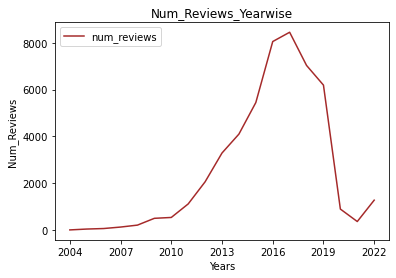

In [18]:
fig = plt.figure(figsize=(20,10))
yearly_reviews.plot(color="brown")
plt.title('Num_Reviews_Yearwise')
plt.xlabel("Years",)
plt.ylabel("Num_Reviews")
plt.xticks(np.arange(0, 19, step=3), ["2004","2007","2010","2013","2016","2019","2022"])
plt.savefig('Num_Reviews_Yearly.png',dpi=1200)
plt.show()

#### Inference: The number of online reviews showed a gradual increasing trend from year 2004 to 2016 and then it started falling down and towards 2019 it had a drastic fall. The number of reviews which are directly proportional to the number of guests are again showing positive growth as Covid restrictions are being lifted.

### Rating Analysis


Plot a box plot of the ratings to see the distribution of ratings given by the reviewers. This will help you identify whether the ratings are normally distributed or skewed, and whether there are any outliers.

You could also analyze the ratings given by each reviewer to determine the average rating of the hotel overall, as well as the average rating for specific aspects of the hotel (such as cleanliness, service, etc.). This can help you understand which areas of the hotel are performing well and which areas need improvement.


You could also plot the average rating over time to see if there are any trends in how guests rate the hotel.


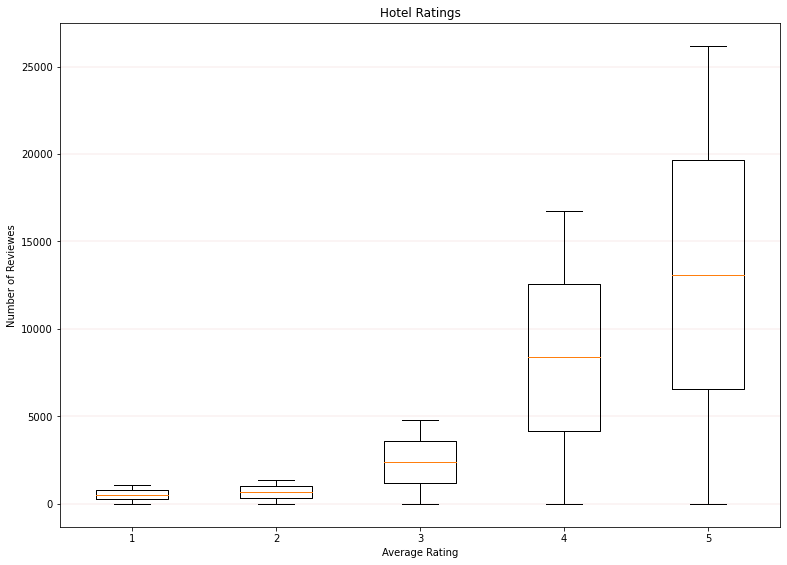

In [71]:
# Define the list of ratings

ratings = data["rating"].tolist()

#create datasets

data1 = np.arange(ratings.count(1))  
data2 = np.arange(ratings.count(2))  
data3 = np.arange(ratings.count(3))  
data4 = np.arange(ratings.count(4))
data5 = np.arange(ratings.count(5))

dataSet = [data1, data2, data3, data4,data5]  
  
figure = plt.figure(figsize =(10, 7))  
ax = figure.add_axes([0, 0, 1, 1]) 
ax.grid(color='indianred', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
bp = ax.boxplot(dataSet)

# Set the title and axis labels
plt.title('Hotel Ratings')
plt.xlabel('Average Rating')
plt.ylabel("Number of Reviewes")
plt.savefig('Hotel_Ratings.png',dpi=1200)

plt.show()  

#### Inference: The ratings are positively skewed. Thus in order to analyse the negative and postive aspects, the data should be seggregated accordingly.

### Reviewer Analysis

You could analyze the nationality of the reviewers to determine which countries the majority of guests come from. This can help you tailor your marketing efforts to target those countries specifically.


 You could also analyze the dates of the reviews to determine if there are any trends in terms of when guests are most likely to visit the hotel.


In [86]:
nationality = data["country"].value_counts()
nationality.head(15)

Singapore         5799
China             3759
Australia         2278
United Kingdom    2116
California        1944
South Korea       1877
Malaysia          1340
Philippines       1296
Canada            1208
New York           911
Thailand           828
Indonesia          723
Japan              663
India              538
Texas              476
Name: country, dtype: int64

# SENTIMENT ANALYSIS using VADER

From Documentation: https://vadersentiment.readthedocs.io/en/latest/

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 

VADER’s SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:negative, neutral,positive, and compound(computed by normalizing the scores)

Vader sentiment not only tells if the statement is positive or negative but also the intensity of emotion.


### About the Scoring

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a ‘normalized, weighted composite score’ is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

positive sentiment: compound score >= 0.5

neutral sentiment: (compound score > -0.5) and (compound score < 0.5)

negative sentiment: compound score <= -0.5

The pos, neu, and neg scores are ratios for proportions of text that fall in each category (so these should all add up to be 1… or close to it with float operation). These are the most useful metrics if you want multidimensional measures of sentiment for a given sentence.

In [88]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [89]:
# Defining functions to get sentiments for each review in our dataset
# Code Help: https://jackmckew.dev/sentiment-analysis-text-cleaning-in-python-with-vader.html

def get_sentiment(text:str, analyser,desired_type:str='pos'):
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,analyzer,'neg'))
    df[f'{data_column} Neutral Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,analyzer,'neu'))
    df[f'{data_column} Compound Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,analyzer,'compound'))
    return df

In [90]:
sentiment_scores = get_sentiment_scores(data,"clean_reviews")

KeyboardInterrupt: 

In [61]:
sentiment_scores.sample(5)

,Hotel,clean_dates,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score
20169,Lotte_City_Hotel_Myeongdong,October 2019,Right choice ! The hotel is very well located!...,0.221,0.062,0.717,0.9463
16771,JW_Marriott_Dongdaemun_Square_Seoul,March 2018,Top notch and service at every step I m a Marr...,0.199,0.007,0.794,0.9947
38543,The_Westin_Josun_Seoul,October 2013,Best service ever in Seoul! I stayed here twic...,0.167,0.000,0.833,0.9722
25923,Nine_Tree_Premier_Hotel_Myeongdong_II,August 2017,Excellent Hotel in the centre of Seoul Nice an...,0.403,0.000,0.597,0.9769
1022,Center_Mark_Hotel_Seoul,September 2014,"Good location Good location, very near to Insa...",0.189,0.018,0.793,0.9337


In [62]:
# function to analyse

def vader_classifier(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

In [68]:
# Applying the classifier to our data

sentiment_scores["sentiment"] = sentiment_scores["clean_reviews Compound Sentiment Score"].apply(vader_classifier)

#Dropping "Hotel" and "clean_dates" columns

sentiment_scores.drop(["Hotel","clean_dates"], axis = 1, inplace = True)

In [69]:
sentiment_scores.sample(5)

,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score,sentiment
5507,Four Seasons Seoul Extremely attentive and hel...,0.294,0.000,0.706,0.9013,Positive
23775,Very good location This is the second time I '...,0.052,0.040,0.908,0.3582,Neutral
699,Ideal base for a city break in Seoul We chose ...,0.288,0.000,0.712,0.9599,Positive
8695,Magical Myeondong Hotel Myeondong 28 always im...,0.349,0.000,0.651,0.9601,Positive
12644,Good location average service The hotel is ste...,0.058,0.042,0.901,0.5434,Positive


### Classified Reviews

In [81]:
# Function to print top scoring reviews for all the different types of sentiment and check if they make sense

def get_top_n_reviews(dataframe,column,num_rows):
    for index,row in dataframe.nlargest(num_rows,column).iterrows():
        print(f"Score: {row[column]}")
        print(f"Review: {row[0]}")
        print(" ")

In [82]:
get_top_n_reviews(sentiment_scores,"clean_reviews Positive Sentiment Score", 4)

Score: 0.778
Review: Best of the best!!! Excellent service! Great ambience! Beautiful scenery! Relaxing room environment!
 
Score: 0.741
Review: FANTASTIC the best place to stay in korea!!!!! Great Location, great room, great staff!!!! Amazing!!!!
 
Score: 0.715
Review: was perfect for me great!!! friendly staffs, fabulous lobby, yummy kitchen, professional service and nice location.
 
Score: 0.713
Review: Great location, outstanding service fabulous hotel, amazing breakfast buffet, well appointed rooms
 


In [83]:
get_top_n_reviews(sentiment_scores,"clean_reviews Negative Sentiment Score", 4)

Score: 0.6
Review: not happy NAME?
 
Score: 0.445
Review: Bad Attitude Bad attitude, Bad behavior And Never Friendly of hotel staff. very disappointing with the hotel management and the staff. They never be friendly and talk rudely with the the hotel guests and customers.
 
Score: 0.425
Review: Rude, racist, unprofessional Rude, racist, unprofessional. And the female workers tried to sell themselves to me. It s a shame. The connected casino at the basement is also a disgrace to the entire place. It looks more like an underground illegal gambling den with equally low class dealers and it is very dirty with workers not even speaking English. It s appalling.
 
Score: 0.399
Review: worst of worst Bad service and crowd foreign people. Check-in was delayed so we wasted our time. I won t go to this hotel again. , .. .
 


In [84]:
get_top_n_reviews(sentiment_scores,"clean_reviews Neutral Sentiment Score", 4)

Score: 1.0
Review: Convenience Location with Reasonable Price My first hotel choice everytime when I visit Seoul! Near Hongik University station, which is one of the airport railway stations and at the same time quite a big interchange station. Very convenience to get to the hotel from the airport when you're dragging a big luggage case, and also convenience for you to travel around in Seoul.
 
Score: 1.0
Review: Location is not convenience I suggest hotel should offer shuttle bus to nearby subway or sightseeing points.As I always need to take taxi as location is not convenience and the room rate is expensive when compare with other 5 stars hotel
 
Score: 1.0
Review: Average Price was high, staff at the front desk didnot speak much English, did not know what was the expectation from a business person.the prices were really very high. I still do not know how much points I got for my 5 days stay
 
Score: 1.0
Review: Incredible hotel! We stayed at the Four Seasons Seoul during our stay in

#### We can see above that the classifications are pretty good. So we will now proceed with further analysis of the data.

In [91]:
#counting the number of positive, negative and neutral reviews

vader_counts = sentiment_scores['sentiment'].value_counts()
vader_counts

Positive    36845
Neutral      1992
Negative     1343
Name: sentiment, dtype: int64

In [101]:
# Counting the length of the reviews and visualization

# Wordcounts for reviews
sentiment_scores["word_count"] = sentiment_scores["clean_reviews"].apply(lambda x: len(x.split()))

#Scaled wordcounts for better visualization

wc_mean = sentiment_scores["word_count"].mean()
wc_deviation = sentiment_scores["word_count"].std()

sentiment_scores["word_count_scaled"] = sentiment_scores["word_count"].apply(lambda x: (x-wc_mean)/wc_deviation)

print(f"Average Word Count = {wc_mean}")

sentiment_scores.sample(3)

Average Word Count = 124.05144350423096


,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score,sentiment,word_count,word_count_scaled
548,great seevice and facilities It is greatest ho...,0.468,0.000,0.532,0.9805,Positive,39,-0.714010
39274,"Convenient Location Very convenient location, ...",0.000,0.038,0.962,-0.2960,Neutral,57,-0.562900
19376,Great room staff We stayed at several hotels i...,0.282,0.000,0.718,0.9681,Positive,63,-0.512529


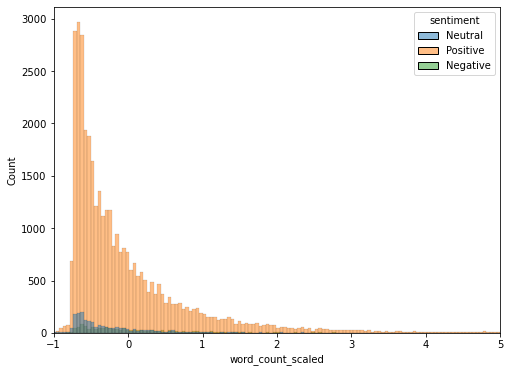

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(data=sentiment_scores, x="word_count_scaled", hue="sentiment", alpha=0.5)

plt.xlim(-1,5)

plt.show()

#### Since the data has high positivity biasness, it is better to analyse the data separately ("Postive","Neutral","Negative") in further analysis.

## Preprocessing the Data for WordClouds and Further Analysis

In [75]:
import nltk
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_lg")

def final_clean(text):
    
    #keeps only letters
    text = re.sub("[^A-Za-z]+", " ", text)
    
    #lowers the text and create spacy object
    doc = nlp(text.lower())
    
    #stopwords
    stop_words = stopwords.words('english')
    new_stopwords = ["hotel","everything","anything","nothing","thing","need",
                     "good","great","excellent","perfect","much","even","really","well","one","nice","definitely","room"]  
    stop_words = stop_words+new_stopwords
    stop_words
 
    
    cleaned_text = []
    
    for token in doc:
        #remove stopwords and keeps only adverbs, adjectives, nouns,and verbs
        if (token.text in stop_words) or (token.pos_ not in ["ADJ","ADV","NOUN","VERB"]):
            pass
        else:
            cleaned_text.append(token.lemma_)  
            
    return " ".join(cleaned_text)

In [76]:
sentiment_scores = pd.read_csv("Sentiment_Scores_TripAdvisor_English_Reviews_Seoul_Hotels.csv")
sentiment_scores.drop("preprocessed_reviews", axis = 1, inplace = True)
sentiment_scores.head(3)

,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score,sentiment,word_count,word_count_scaled
0,Unsatisfied stay in Amanti Seoul We reserved 2...,0.044,0.061,0.894,-0.1627,Neutral,198,0.620801
1,Nice Hotel with Great Location and Value for M...,0.329,0.000,0.671,0.9590,Positive,48,-0.638455
2,Great Hotel It is a very nice hotel. The rooms...,0.416,0.000,0.584,0.9785,Positive,45,-0.663640


In [77]:
text = sentiment_scores["clean_reviews"][3000]
text


"Nice Hotel in Gangnam This is a surprisingly nice hotel befitting, even beyond, Marriott Courtyard's standard. Located within walking distance from airport limousine bus stop, and surrounded by both high-end shops and local market entertainment spots, making our first stay here a very memorable one. Service is excellent, even the bar tender bend over to make us our own drink based on our own recipe. Generally other staffs are very helpful in attending to our needs. Definitely will return to this hotel and its vicinity."

In [78]:
final_clean(text)

'gangnam surprisingly befit standard locate walk distance airport limousine bus stop surround high end shop local market entertainment spot make first stay memorable service bar tender bend make drink base recipe generally staff helpful attend need return vicinity'

In [79]:
# Cleaning the data
sentiment_scores["preprocessed_reviews"] = sentiment_scores["clean_reviews"].apply(final_clean)
sentiment_scores.sample(3)

,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score,sentiment,word_count,word_count_scaled,preprocessed_reviews
28689,Top Ten Hyatt In The World The Park Hyatt Seou...,0.212,0.060,0.728,0.8930,Positive,58,-0.554505,top hyatt world world class love travel spirit...
6287,Great family stay Was staying there for 7 nigh...,0.212,0.000,0.788,0.9321,Positive,56,-0.571295,family stay stay night family spacious locatio...
3287,Top marks for this top performer I came away f...,0.124,0.028,0.849,0.9984,Positive,934,6.799552,top mark top performer come away new courtyard...


In [80]:
# Word cloud of all the reviews

import matplotlib.pyplot as plt

from wordcloud import WordCloud

def plot_wordcloud(series,output_filename='wordcloud'):
    
    wordcloud = WordCloud(collocations = False,
                          background_color = "white",
                          width=1600, 
                          height=800, 
                          margin=2,
                          min_font_size=20).generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')
    
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.figtext(.5,.8,output_filename,fontsize = 60, ha='center')
    return plt.show()     

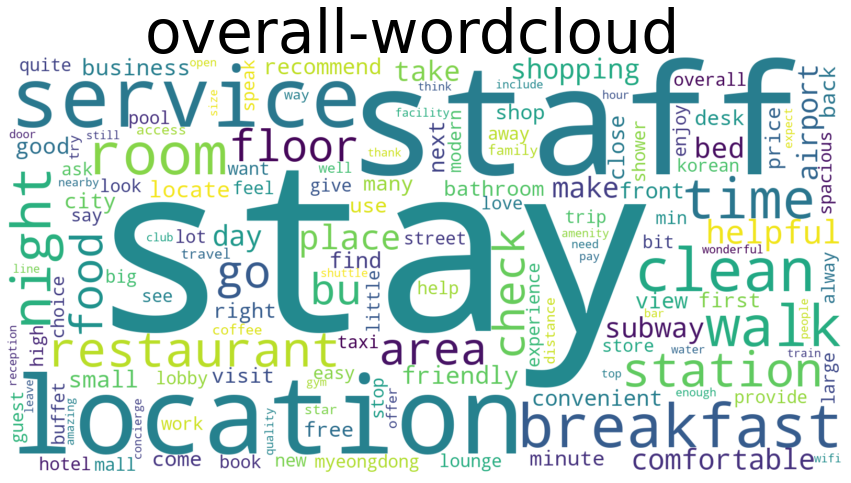

In [81]:
plot_wordcloud(sentiment_scores["preprocessed_reviews"],'overall-wordcloud')

In [82]:
#Function for the wordclouds by Positivity, Negativity, and Neutrality

def plot_wordcloud_top_n(df,num_reviews,score_column,data_column,output_filename):
    
    sliced_df = df.nlargest(num_reviews,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)

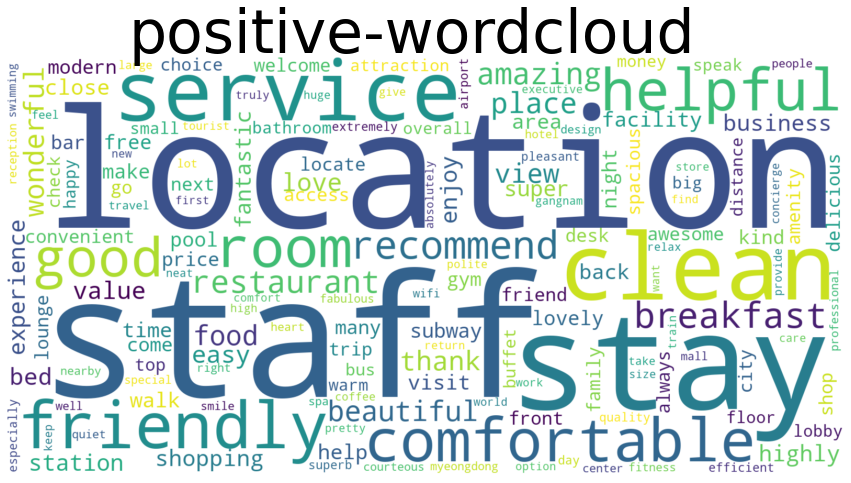

In [83]:
plot_wordcloud_top_n(sentiment_scores,1000,'clean_reviews Positive Sentiment Score','preprocessed_reviews','positive-wordcloud')

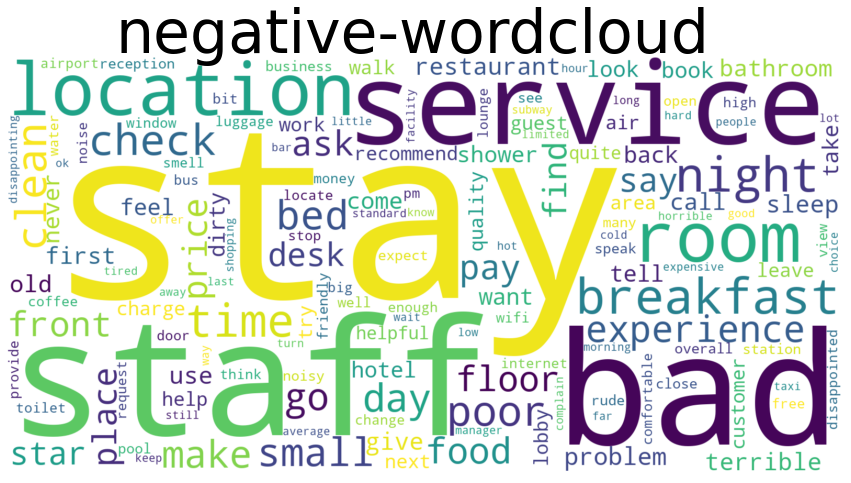

In [84]:
plot_wordcloud_top_n(sentiment_scores,1000,'clean_reviews Negative Sentiment Score','preprocessed_reviews','negative-wordcloud')

In [85]:
## Dividing the DataFrame into Three

df_positive_sen = sentiment_scores[sentiment_scores['sentiment']=='Positive']
df_negative_sen = sentiment_scores[sentiment_scores['sentiment']=='Negative']
df_neutral_sen =sentiment_scores[sentiment_scores['sentiment']=='Neutral']

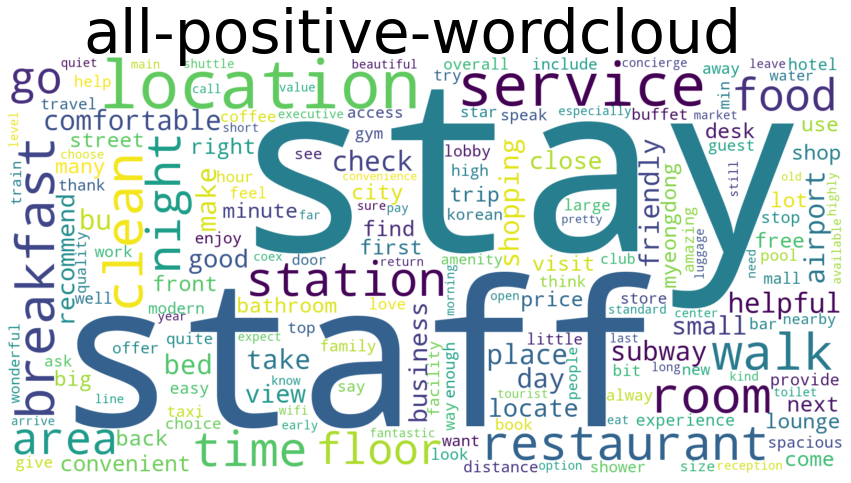

In [86]:
plot_wordcloud(df_positive_sen["preprocessed_reviews"],'all-positive-wordcloud')

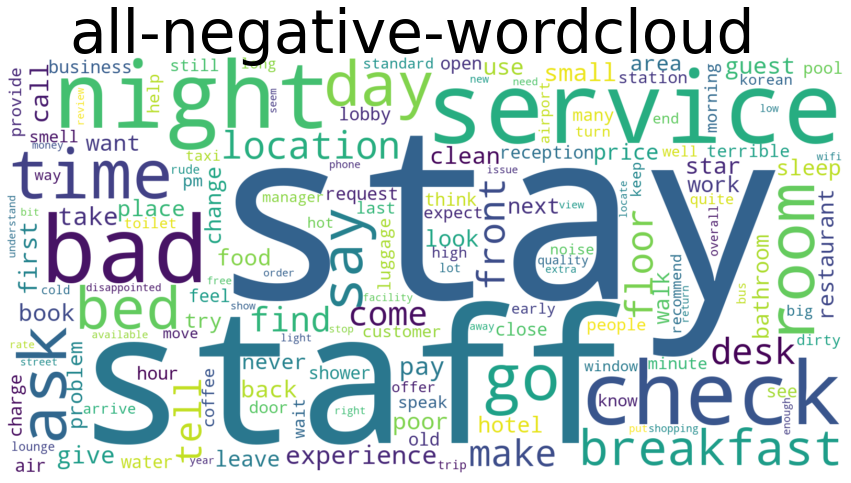

In [87]:
plot_wordcloud(df_negative_sen["preprocessed_reviews"],'all-negative-wordcloud')

In [88]:
# saving the sentiment_scores for future use

sentiment_scores.to_csv("Sentiment_Scores_TripAdvisor_English_Reviews_Seoul_Hotels.csv", index = False)

In [ ]:
data.groupby(["country"])["clean_reviews"].count()